# Attribute Information
-----------------------------
>### Features
1. `X` : ID pelanggan.
2. `jumlah_kartu` : Jumlah kartu aktif yang dimiliki pelanggan.
3. `outstanding` : Total saldo pemakaian kartu kredit.
4. `limit_kredit` : Jumlah maksimum limit kartu kredit yang dapat digunakan.
5. `tagihan` : Jumlah tagihan pada bulan terakhir.
6. `total_pemakaian_tunai` : Total pemakaian transaksi tunai pada bulan terakhir (cash advance).
7. `total_pemakaian_retail` : Total pemakaian transaksi retail pada bulan terakhir.
8. `sisa_tagihan_tidak_terbayar` : Jumlah tagihan yang tidak terbayar pada bulan terakhir.
9. `kode_cabang` : Kode Cabang.
10. `rasio_pembayaran` : Rasio perbandingan jumlah yang dibayar dengan tagihan pada bulan terakhir.
11. `persentasi_overlimit` : Persentasi overlimit.
12. `rasio_pembayaran_3bulan` : Rata-rata rasio pembayaran 3 bulan terakhir.
13. `rasio_pembayaran_6bulan` : Rata-rata rasio pembayaran 3 bulan sebelum 3 bulan terakhir
14. `skor_delikuensi` : Nilai yang dihitung berdasarkan jumlah minimum pembayaran yang dilakukan pelanggan dalam 6 bulan terakhir.
15. `flag_kredit_macet` : Flag yang menandakan apakah kredit macet atau tidak.
16. `jumlah_tahun_sejak_pembukaan_kredit` : Jumlah tahun sejak pembukaan kartu kredit pertama kali.
17. **`total_pemakaian` : Total pemakaian kartu kredit (tunai dan retail) pada bulan terakhir.**
18. **`sisa_tagihan_per_jumlah_kartu` : Jumlah tagihan yang tidak terbayar pada bulan terakhir dibagi jumlah kartu aktif.**
19. **`sisa_tagihan_per_limit` : Jumlah tagihan yang tidak terbayar pada bulan terakhir dibagi total limit.**
20. **`total_pemakaian_per_limit` : Total pemakaian kartu kredit (tunai dan retail) pada bulan terakhir dibagi total limit.**
21. `pemakaian_3bln_per_limit` : Rata-rata pemakaian selama 3 bulan terakhir dibagi total limit.
22. `pemakaian_6bln_per_limit` : Rata-rata pemakaian selama 3 bulan sebelum 3 bulan terakhir dibagi total limit.
23. `utilisasi_3bulan` : Utilisasi kartu kredit selama 3 bulan terakhir.
24. `utilisasi_6bulan` : Utilisasi kartu kredit selama 3 bulan sebelum 3 bulan terakhir.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as mtfm
import matplotlib.gridspec as grids
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
import warnings; warnings.filterwarnings('ignore') # Just ignore user warning
pd.options.display.max_columns = None

def boxplot(dataset, feature_to_plot, title='Boxplot', colorb='b'):
    plt.figure(figsize=(20,15))
    gs = grids.GridSpec(4,3)
    for i, feature in enumerate(feature_to_plot):
        ax = plt.subplot(gs[i])
        sns.boxplot(y=feature, data=dataset, color=colorb)
        plt.title(feature,size=15)
        ax.set_ylabel(' ')
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.suptitle(title,size=20)

def distplot(dataset,feature_to_plot,title="Dataset Distribution",
                logx=False,featlog=[],colorhist="y",colorline="k"):
    if len(feature_to_plot)==2:
        gs = grids.GridSpec(1,2)
        plt.figure(figsize=(25,10))
    else:
        plt.figure(figsize=(25,20))
        gs = grids.GridSpec(3,3)   
    for i, feature in enumerate(feature_to_plot):
        ax = plt.subplot(gs[i])
        sns.distplot(dataset[feature], color=colorhist,
              kde_kws={"color": colorline,
                       "lw": 3,
                       "label": "KDE"})
        if logx==True:
            if feature in featlog:
                ax.set_xlabel('log('+str(feature)+')', size=20)
            else:
                ax.set_xlabel(xlabel=feature, size=20)
        else:
            ax.set_xlabel(xlabel=feature, size=20)
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.legend(prop = mtfm.FontProperties(size=15))
        plt.suptitle(title,size=25)

def transform_data(dataset, features_to_transform, scaler_type = 'log'):
    data_to_scale = dataset.copy()
    if scaler_type=='log':
        for feature in features_to_transform:
            data_to_scale[feature] = np.log(data_to_scale[feature]+1)
    elif scaler_type=='sqrt':
        for feature in features_to_transform:
            data_to_scale[feature] = np.sqrt(data_to_scale[feature])
    elif scaler_type=='sigmoid':
        for feature in features_to_transform:
            data_to_scale[feature] = 1/(1+np.exp(-1*data_to_scale[feature]))        
    return data_to_scale

def scale_data(dataset, features_to_scale, scaler_type='minmax'):
    data = dataset.copy()
    if scaler_type=='minmax':
        Scaler = MinMaxScaler()
        for feature in features_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)
    elif scaler_type=='standard':
        Scaler = StandardScaler()
        for feature in features_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)        
    elif scaler_type=='robust':
        Scaler = RobustScaler()
        for feature in features_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)
    elif scaler_type=='power':
        Scaler = PowerTransformer()
        for feature in features_to_scale:
            series_to_scale = data[feature].astype('float64').values.reshape(-1,1)
            data[feature] = Scaler.fit_transform(series_to_scale)
    return data

def whiten_data(dataset, features_to_whiten):
    data = dataset.copy().dropna()
    data[features_to_whiten] = PCA().fit_transform(data[features_to_whiten])
    return data

/anaconda3/envs/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
df_train_raw = pd.read_csv('input_data/npl_train.csv').drop('X', axis=1)
df_test_raw = pd.read_csv('input_data/npl_test.csv').drop('X', axis=1)
label_column = 'flag_kredit_macet'

# Put the label column on the last column to make it nicer to work with
df_train_raw = df_train_raw[[col for col in df_train_raw.columns if col!=label_column]+[label_column]]

In [7]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 23 columns):
jumlah_kartu                           15493 non-null int64
outstanding                            15493 non-null int64
limit_kredit                           15493 non-null float64
tagihan                                15493 non-null float64
total_pemakaian_tunai                  15493 non-null float64
total_pemakaian_retail                 15493 non-null float64
sisa_tagihan_tidak_terbayar            15493 non-null float64
kode_cabang                            15393 non-null object
rasio_pembayaran                       15493 non-null float64
persentasi_overlimit                   15493 non-null float64
rasio_pembayaran_3bulan                15493 non-null float64
rasio_pembayaran_6bulan                15493 non-null float64
skor_delikuensi                        15493 non-null int64
jumlah_tahun_sejak_pembukaan_kredit    15493 non-null float64
total_pemakaian               

In [8]:
# See how many missing values there are in each column
df_train_raw.isna().sum()

jumlah_kartu                             0
outstanding                              0
limit_kredit                             0
tagihan                                  0
total_pemakaian_tunai                    0
total_pemakaian_retail                   0
sisa_tagihan_tidak_terbayar              0
kode_cabang                            100
rasio_pembayaran                         0
persentasi_overlimit                     0
rasio_pembayaran_3bulan                  0
rasio_pembayaran_6bulan                  0
skor_delikuensi                          0
jumlah_tahun_sejak_pembukaan_kredit      0
total_pemakaian                          0
sisa_tagihan_per_jumlah_kartu            0
sisa_tagihan_per_limit                   0
total_pemakaian_per_limit                0
pemakaian_3bln_per_limit                 0
pemakaian_6bln_per_limit                 0
utilisasi_3bulan                         0
utilisasi_6bulan                         0
flag_kredit_macet                        0
dtype: int6

In [9]:
df_train_raw.describe()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,flag_kredit_macet
count,15493.000000,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,15493.00000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,1.549300e+04,1.549300e+04,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000
mean,2.506551,1.159833e+07,2.079833e+07,8.078663e+06,7.453291e+04,2.025857e+06,8.140875e+06,64.64712,3.343533,50.530351,81.666238,0.004776,6.634093,2.100421e+06,2.968060e+06,0.468246,0.109362,0.167446,0.202609,0.571102,0.533719,0.087717
std,1.012655,2.408569e+07,2.955334e+07,1.761286e+07,6.184139e+05,7.927677e+06,1.922430e+07,794.16940,9.241921,1327.275247,1467.822452,0.114088,4.675454,8.092612e+06,6.262192e+06,0.473056,0.200159,0.192327,0.274293,0.411928,0.432350,0.282892
min,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.00000,0.000000,-57792.340000,-77056.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000,0.000000
25%,2.000000,2.000551e+06,5.000000e+06,8.182500e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,20.200000,21.600000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035200,0.032900,0.189000,0.155000,0.000000
50%,2.000000,4.726943e+06,9.000000e+06,3.145857e+06,0.000000e+00,2.010420e+05,2.750923e+06,27.00000,0.000000,50.000000,65.600000,0.000000,5.666667,2.480000e+05,1.209318e+06,0.335000,0.022100,0.108000,0.117000,0.575000,0.496000,0.000000
75%,3.000000,1.064848e+07,2.200000e+07,7.404991e+06,0.000000e+00,1.398000e+06,7.143198e+06,100.00000,1.060000,91.370000,100.000000,0.000000,9.330000,1.512235e+06,3.088477e+06,0.930000,0.128000,0.239000,0.285000,0.917000,0.863000,0.000000
max,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.00000,190.000000,75575.000000,54899.000000,5.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000,1.000000


In [10]:
df_train_raw.head(20)

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,flag_kredit_macet
0,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,0.00,74.78,100.00,0,15.416667,94.0,13161.500,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949,0
1,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.00,0.00,0.00,0,0.750000,1012.0,0.000,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300,0
2,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.00,100.00,100.91,0,10.750000,0.0,0.000,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853,0
3,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,0.00,25.01,22.64,0,19.750000,2536660.0,145333.500,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635,0
4,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.00,97.49,99.84,0,1.666667,2666558.0,2975932.500,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571,0
5,2,6227439,80000000.0,2081248.0,0.0,3690250.0,4613435.0,A,0.00,0.00,28.46,42.03,0,10.250000,3690250.0,2306717.500,0.057668,0.046128,0.017184,0.117513,0.038964,0.181863,0
6,2,3906290,4000000.0,2043682.0,0.0,230400.0,3314046.0,A,18.47,0.00,24.95,17.89,0,4.666667,230400.0,1657023.000,0.828511,0.057600,0.018750,0.166667,1.014776,0.977231,0
7,4,9534837,20000000.0,3692028.0,0.0,9327612.0,7881069.0,A,58.55,0.00,105.24,166.67,0,0.750000,9327612.0,1970267.250,0.394053,0.466381,0.239289,0.241599,0.261753,0.224026,0
8,2,4145065,5000000.0,4021399.0,0.0,335680.0,4122425.0,B,15.24,0.00,0.00,33.33,0,5.666667,335680.0,2061212.500,0.824485,0.067136,0.196042,0.000000,0.470024,0.000000,0
9,4,1818606,7000000.0,1765911.0,0.0,0.0,1627786.0,A,100.00,0.00,58.40,62.68,0,8.500000,0.0,406946.500,0.232541,0.000000,0.075000,0.094801,0.315145,0.626448,0


# Distributions

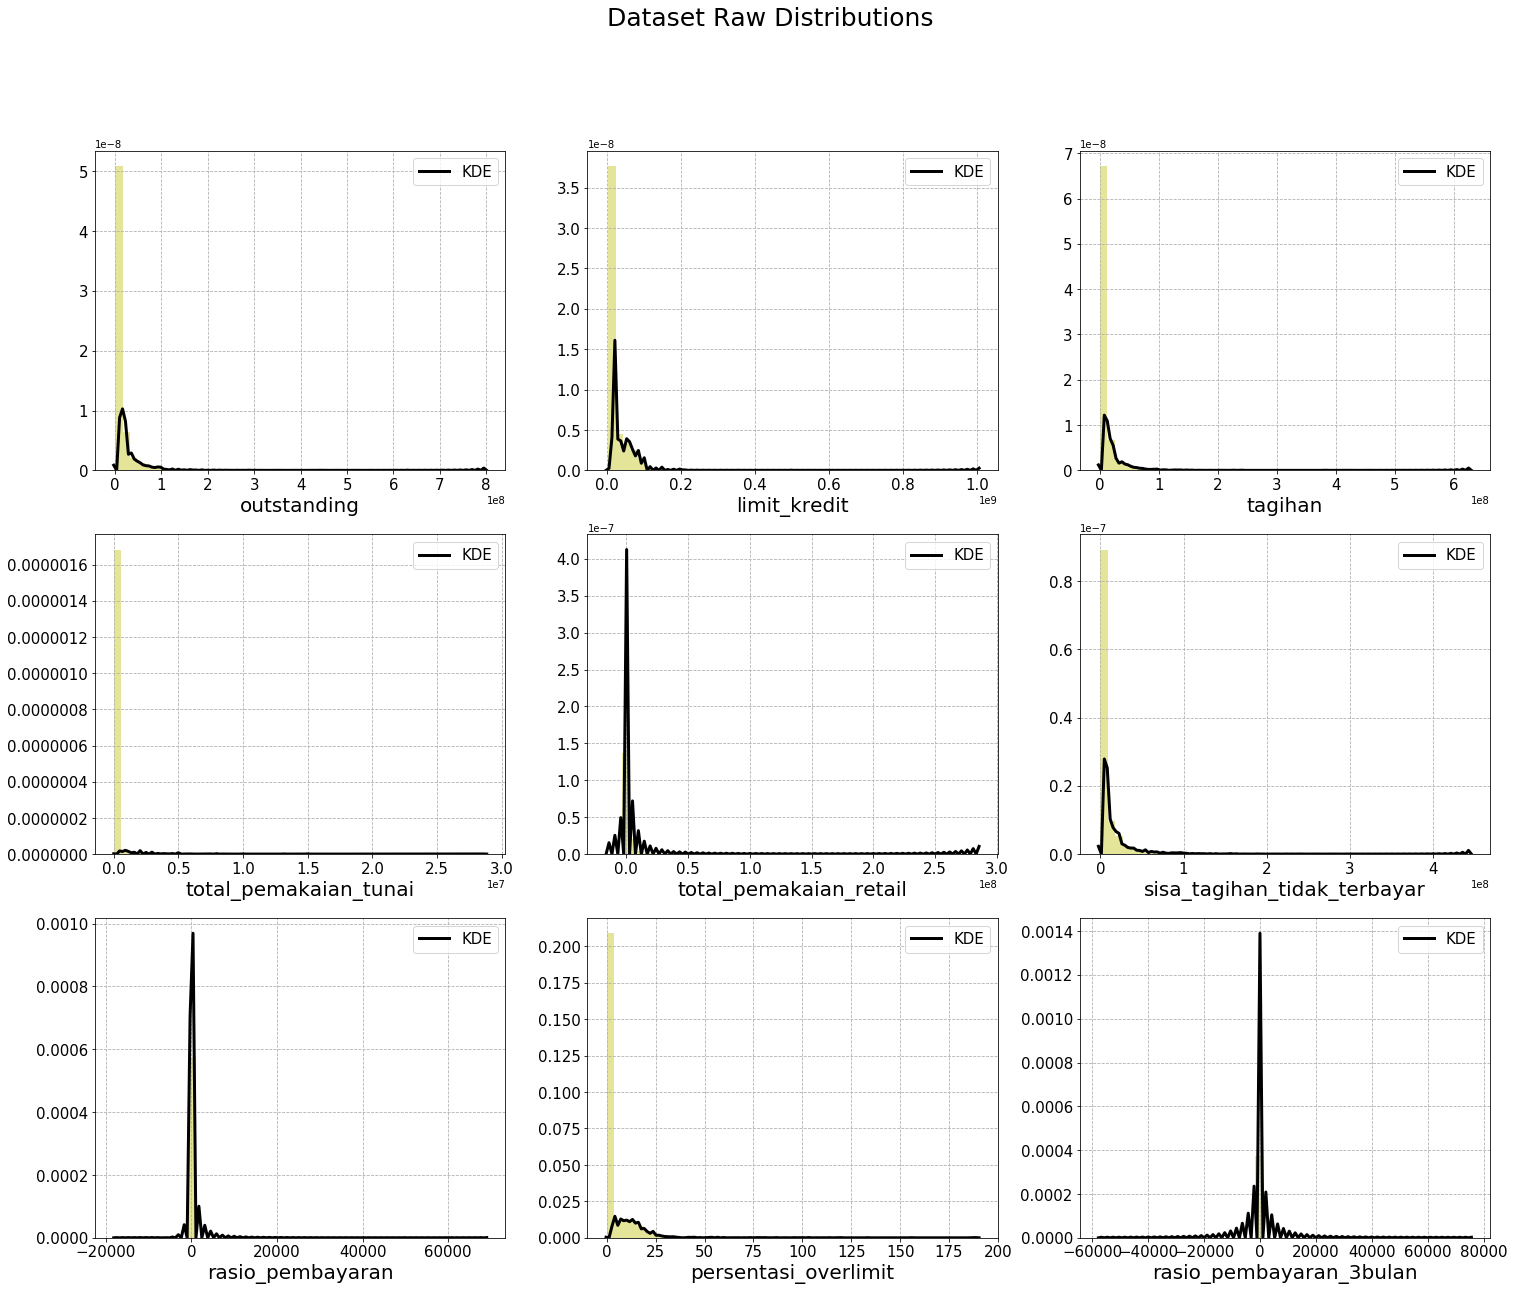

In [11]:
features_to_plot = ['outstanding', 'limit_kredit', 'tagihan',
                   'total_pemakaian_tunai', 'total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar',
                   'rasio_pembayaran','persentasi_overlimit', 'rasio_pembayaran_3bulan']
distplot(df_train_raw, features_to_plot, title='Dataset Raw Distributions')

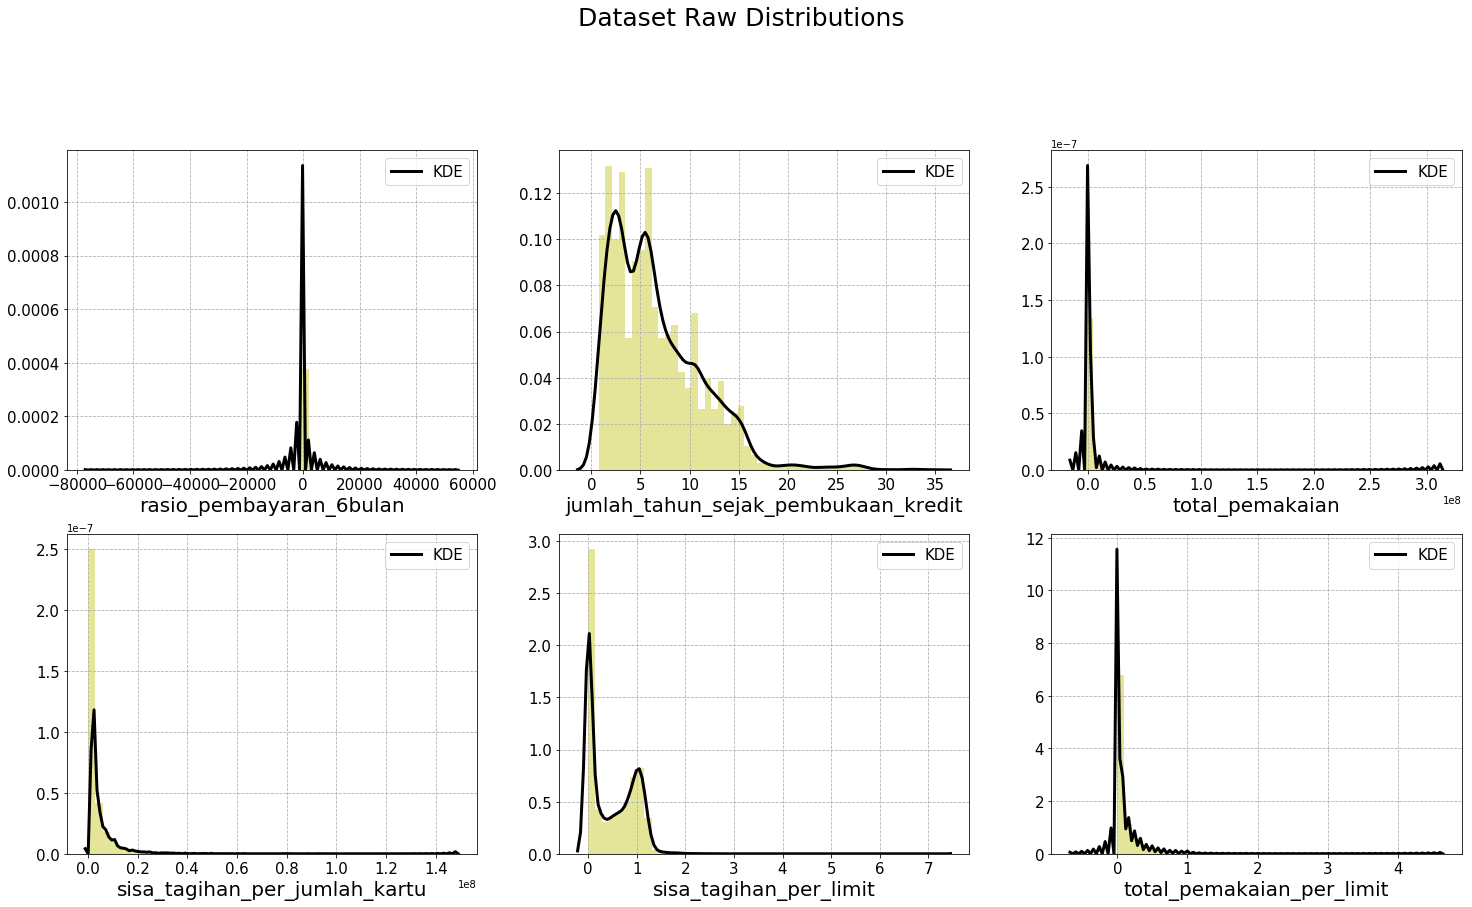

In [12]:
features_to_plot = ['rasio_pembayaran_6bulan', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
                    'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit']
distplot(df_train_raw, features_to_plot, title='Dataset Raw Distributions')

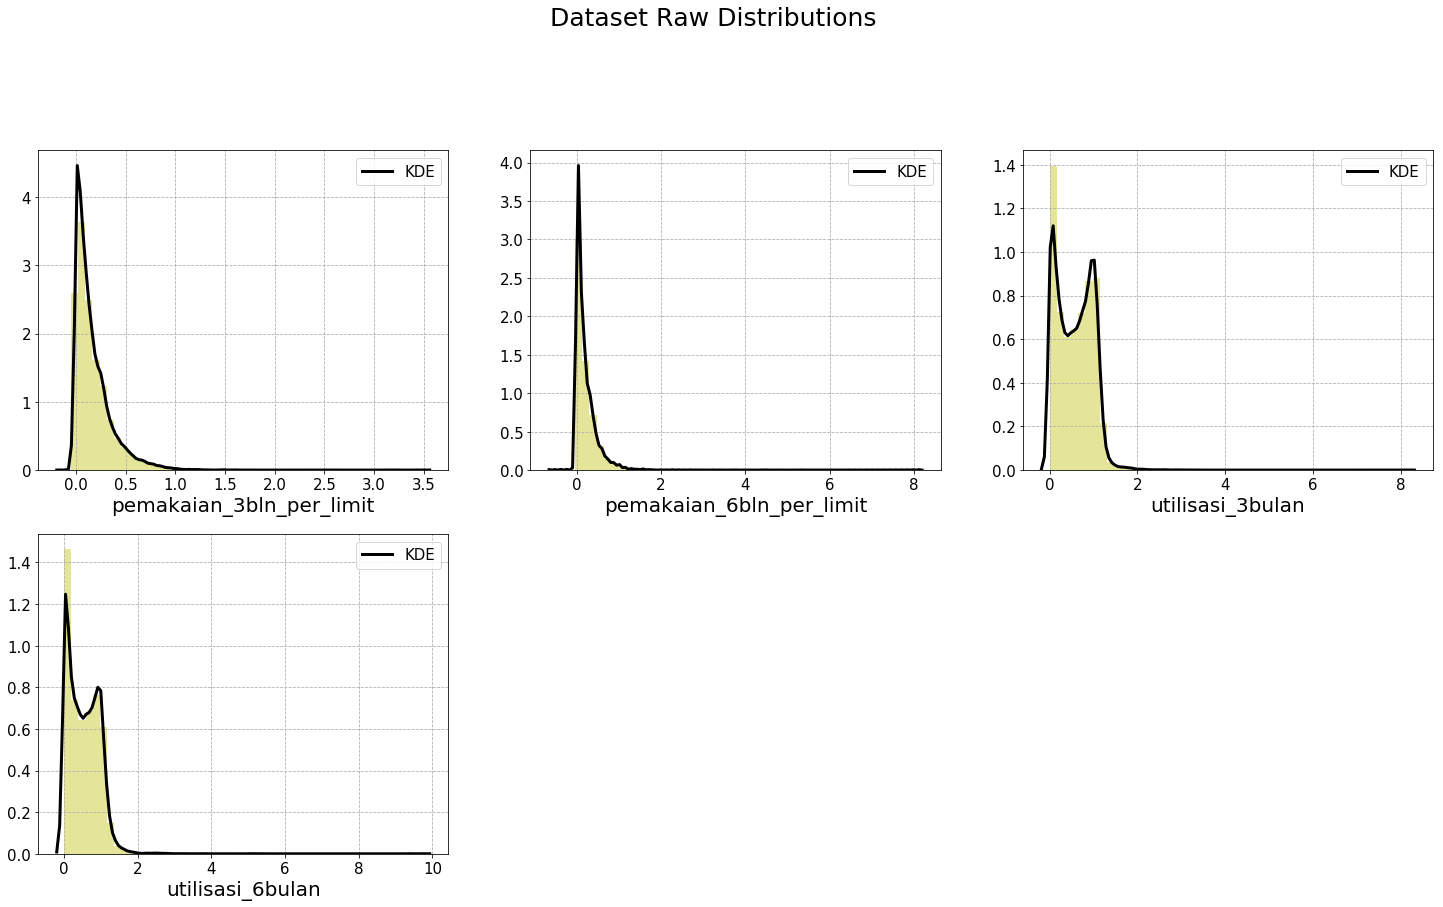

In [13]:
features_to_plot = ['pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan']
distplot(df_train_raw, features_to_plot, title='Dataset Raw Distributions')

In [13]:
# Categorical features can't easily be correlated, so we drop them for correlation matrix
df_train_no_categorical = df_train_raw.drop('kode_cabang', axis=1)

colors = ['b' if row is 0 else 'r' for row in df_train_raw[label_column]]

# Scatter Matrix

In [11]:
def plot_scatter_matrix(dataframe, colors):
    plt.figure()
    axs = pd.scatter_matrix(dataframe, figsize=(20,20), c=colors)
    n = len(dataframe.columns)
    for x in range(n):
        for y in range(n):
            ax = axs[x, y] # to get the axis of subplots
            ax.xaxis.label.set_rotation(90) # to make x axis name vertical  
            ax.yaxis.label.set_rotation(0) # to make y axis name horizontal 
            ax.yaxis.labelpad = 80 # to make sure y axis names are outside the plot area
    plt.show()

<Figure size 432x288 with 0 Axes>

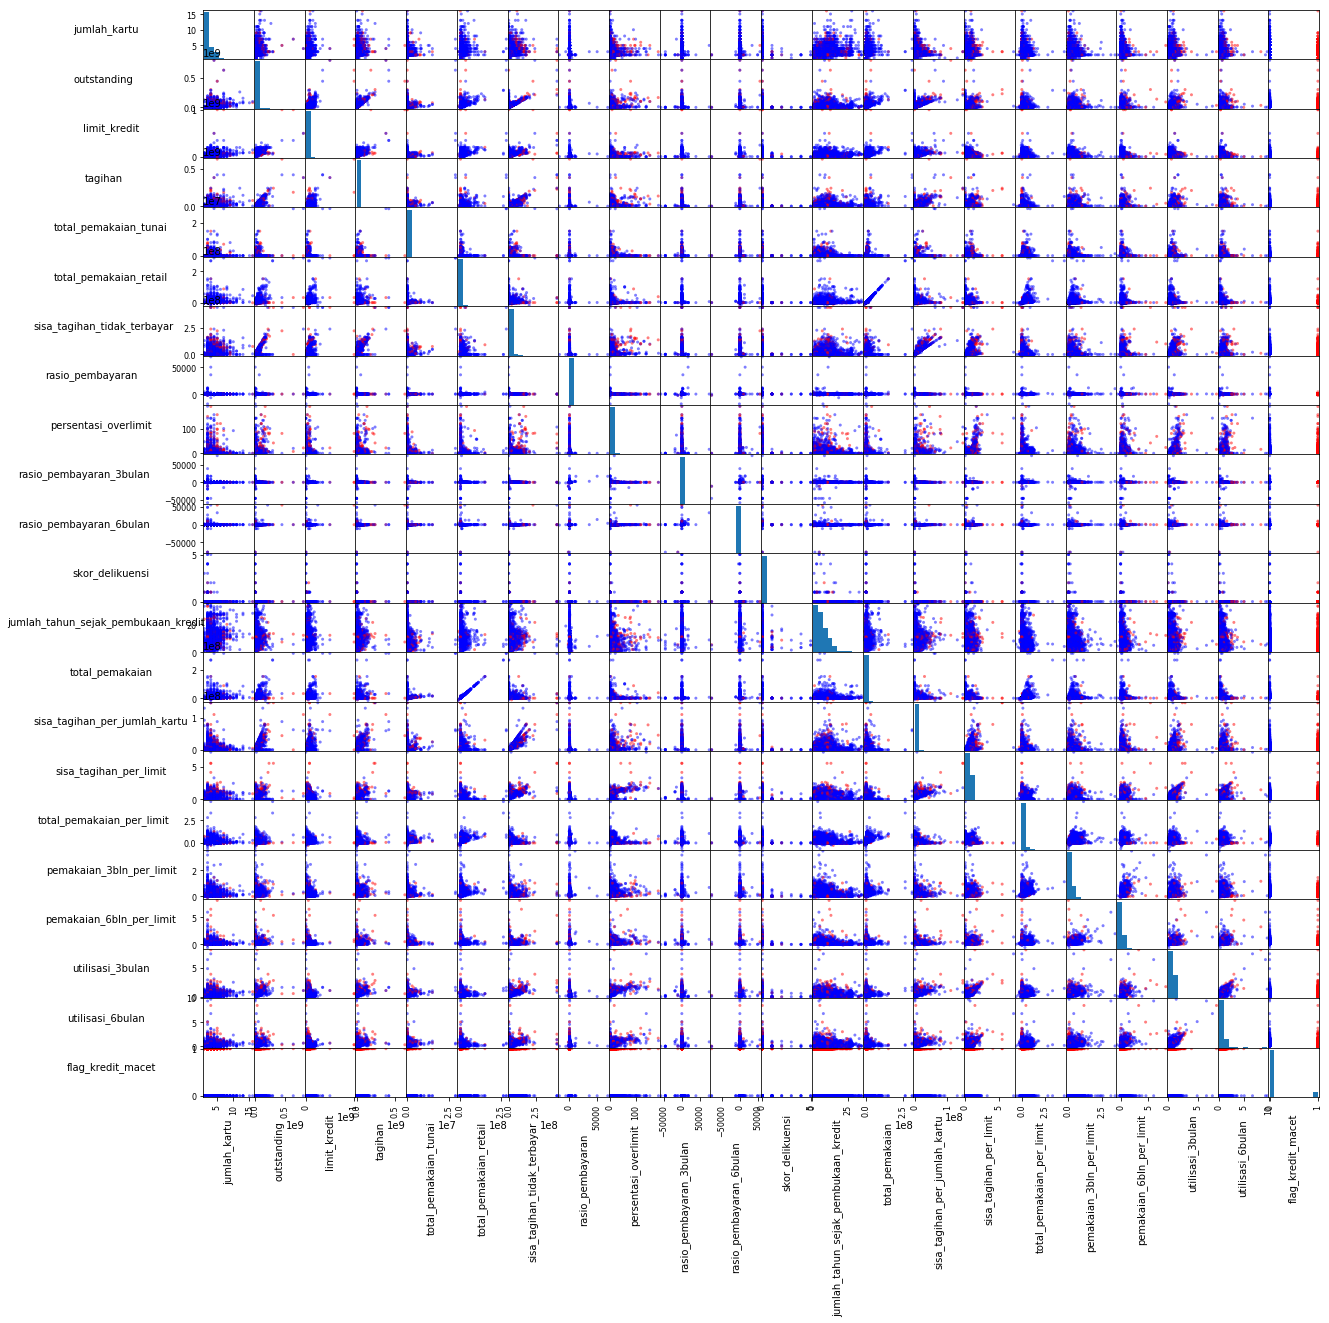

In [12]:
plot_scatter_matrix(df_train_no_categorical, colors=colors)

# Correlation Matrix

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_correlation_matrix(dataframe):           
    
    plt.figure(figsize=(14,13))
    
    ax = sns.heatmap(dataframe, annot=True, vmin=-1, vmax=1, fmt=".1f", square=True, cmap="RdBu", linewidths=0.5)

    labels = dataframe.columns
    ax.set_xticklabels(labels, fontsize = 8, rotation=90, ha='center', minor=False)
    ax.set_yticklabels(labels, fontsize = 8, rotation=0)
    ax.set_xticks(np.arange(dataframe.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(dataframe.shape[0]) + 0.5, minor=False)
    
    plt.title('Correlation Matrix')
    plt.show()

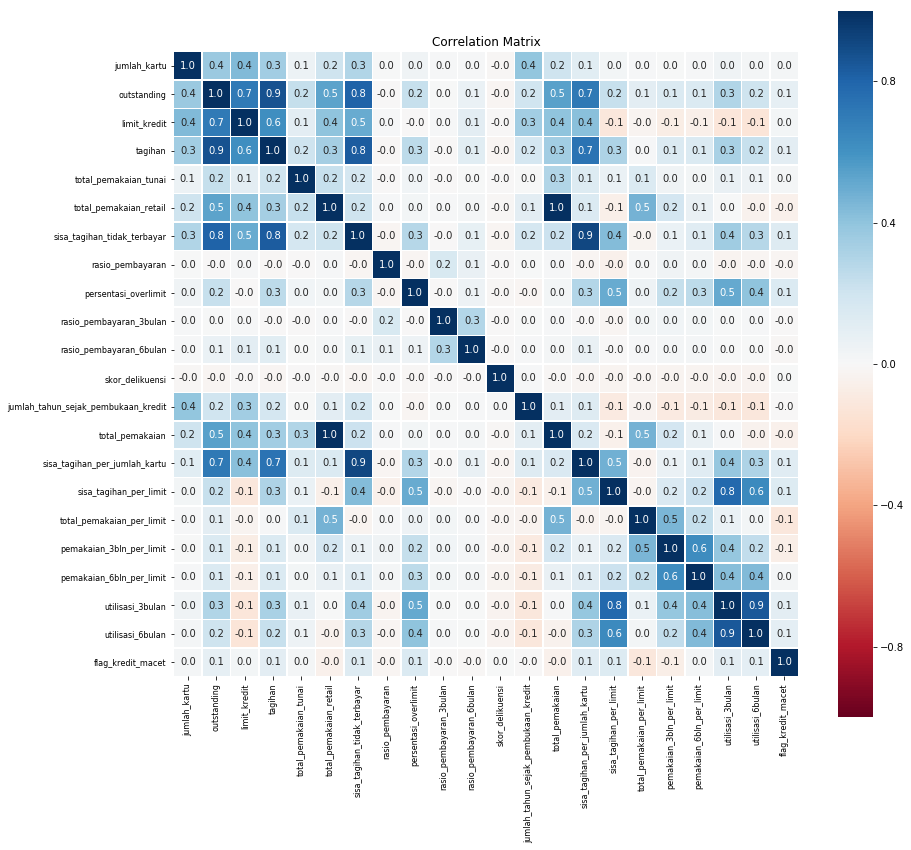

In [15]:
plot_correlation_matrix(df_train_no_categorical.corr())

Here we can see the features are highly correlated:  
`outstanding` with `limit_kredit`, `tagihan`, `sisa_tagihan_tidak_terbayar` and `sisa_tagihan_per_jumlah_kartu`  
`sisa_tagihan_per_jumlah_kartu` with `sisa_tagihan_tidak_terbayar`  
`total_pemakaian` with `total_pemakaian_retail`  
`utilisasi_3bulan` with `utilisasi_6bulan` and `sisa_tagihan_per_limit`  

# Feature Importance

Now we're gonna train a random forest classifier without any feature engineering, for looking at the feature importances.

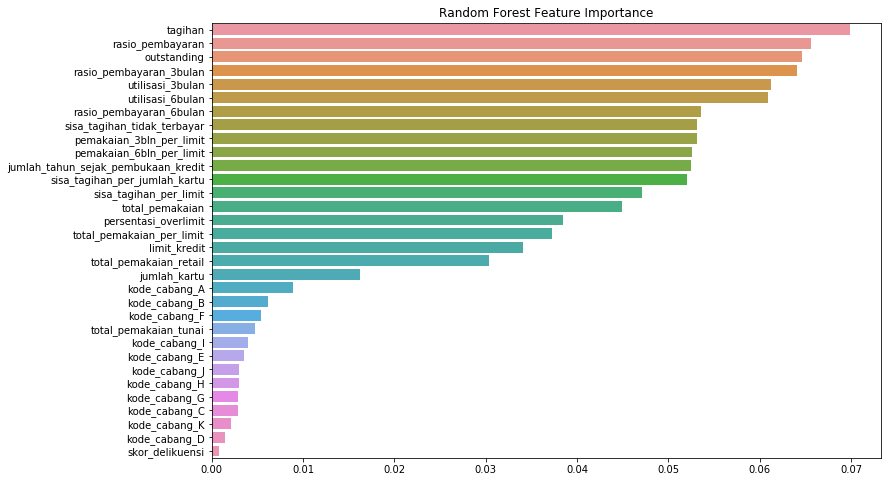

In [16]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

x = df_train_raw.drop(label_column, axis=1)
x = pd.get_dummies(x) # One-hot encode the categorical features
y = df_train_raw[label_column]

RFC = RandomForestClassifier()
RFC.fit(x,y)
asd = pd.Series(RFC.feature_importances_, x.columns.values)
asd.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x=asd.values, y=asd.index)
plt.title('Random Forest Feature Importance')
plt.show()

Features `skor_delikuensi`, `kode_cabang`, `total_pemakaian_tunai`, `jumlah_kartu` have low importances

# Data Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler

df_train_x = df_train_raw.drop(label_column, axis=1)
df_train_y = df_train_raw[label_column]

# Manually generate corrupted features
df_train_x['sisa_tagihan_per_jumlah_kartu'] = df_train_x['sisa_tagihan_tidak_terbayar']/df_train_x['jumlah_kartu']
df_train_x['sisa_tagihan_per_limit'] = df_train_x['sisa_tagihan_tidak_terbayar']/df_train_x['limit_kredit']
df_train_x['total_pemakaian'] = df_train_x['total_pemakaian_tunai']+df_train_x['total_pemakaian_retail']
df_train_x['total_pemakaian_per_limit'] = df_train_x['total_pemakaian']/df_train_x['limit_kredit']

# Feature selection
'''features_to_drop = ['kode_cabang', 'tagihan',
                   'sisa_tagihan_per_limit', 'sisa_tagihan_per_jumlah_kartu',
                   'skor_delikuensi', 'jumlah_kartu', 'total_pemakaian_tunai',
                   'limit_kredit', 'sisa_tagihan_tidak_terbayar', 'utilisasi_6bulan',
                   'rasio_pembayaran_3bulan','rasio_pembayaran_6bulan']'''
features_to_drop = ['kode_cabang', 'skor_delikuensi', 'jumlah_kartu']
df_train_x = df_train_x.drop(features_to_drop, axis=1)

# Transform data
features_to_transform = ['outstanding','limit_kredit','tagihan','total_pemakaian_tunai',
                         'sisa_tagihan_tidak_terbayar','persentasi_overlimit','jumlah_tahun_sejak_pembukaan_kredit',
                         'sisa_tagihan_per_jumlah_kartu','sisa_tagihan_per_limit']
features_to_transform_2 = ['total_pemakaian_retail','rasio_pembayaran','rasio_pembayaran_3bulan',
                         'rasio_pembayaran_6bulan','total_pemakaian','total_pemakaian_per_limit']


df_train_x = transform_data(df_train_x, features_to_transform, scaler_type = 'log')
df_train_x = scale_data(df_train_x, features_to_transform, scaler_type='power')

#df_train_x = transform_data(df_train_x, features_to_transform_2, scaler_type = 'sigmoid')
df_train_x = scale_data(df_train_x, features_to_transform, scaler_type='power')

# Standardize data
columns = df_train_x.columns
scaler = StandardScaler()
scaler.fit(df_train_x)
df_train_x = scaler.transform(df_train_x)
df_train_x = pd.DataFrame(df_train_x, columns=columns)

In [18]:
# Save to file
df_train_preprocessed = df_train_x.copy()
df_train_preprocessed[label_column] = df_train_y
df_train_preprocessed.to_csv('input_data/data_train_preprocessed_final.csv')

# Visualize dimensionality reduction

### PCA

In [19]:
from sklearn.decomposition import PCA

def plot_pca(dataframe, colors=None, scree_plot=True, loading_plot=False):
    '''
    TODO : complete the loading plot
    '''
    pca = PCA(n_components=len(dataframe.columns))
    principal_components = pca.fit_transform(dataframe)
 
    plt.figure(figsize=(12,12))
    plt.scatter(principal_components[:,0], principal_components[:,1], c=colors, marker='.', alpha=0.1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA')
    plt.show()
    
    if scree_plot:
        var= pca.explained_variance_ratio_*100 #The amount of variance that each PC explains
        cum_var=np.cumsum(pca.explained_variance_ratio_)*100 #Cumulative Variance explains
        
        # Plot per component explained variance
        plt.figure(figsize=(12,6))
        plt.bar(range(len(dataframe.columns)), var, fill=False)
        plt.plot(var, color='blue', label='per component')
        plt.scatter(range(len(dataframe.columns)), var, color='blue')
        for i, value in enumerate(var):
            plt.annotate(str(round(value,2))+'%', xy=(i, value), horizontalalignment='center', verticalalignment='bottom')
        
        # Plot cummulative explained variance
        plt.plot(cum_var, color='orange', label='cumulative')
        plt.scatter(range(len(dataframe.columns)), cum_var, color='orange')
        for i, value in enumerate(cum_var):
            plt.annotate(str(round(value,2))+'%', xy=(i, value), horizontalalignment='center', verticalalignment='bottom')

        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance (%)')
        plt.title('Scree Plot')
        plt.legend()
        plt.show()
    
    if loading_plot:
        pass
    
    principal_components = pd.DataFrame(principal_components, columns=["principal_component_"+str(i+1) for i in range(principal_components.shape[1])])
    return principal_components

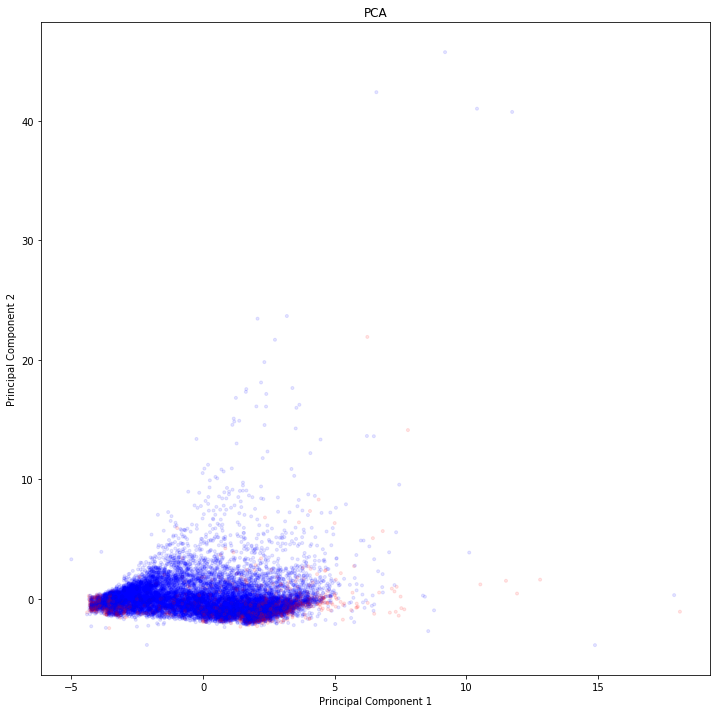

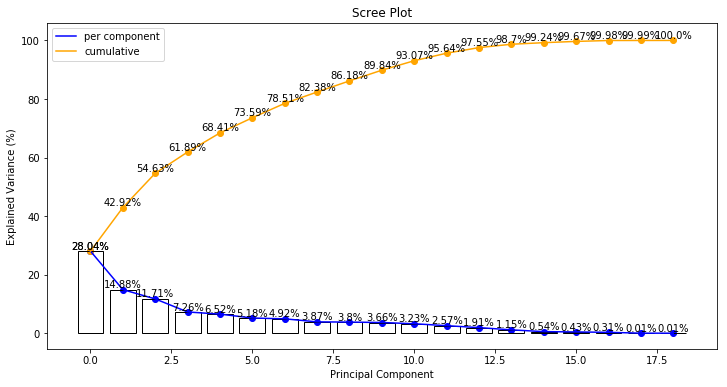

In [20]:
principal_components = plot_pca(df_train_x, colors=colors)

### UMAP

In [35]:
import umap

umap = umap.UMAP(init=principal_components.values[:,:2], n_neighbors=15)
umap_embedding = umap.fit_transform(df_train_x)

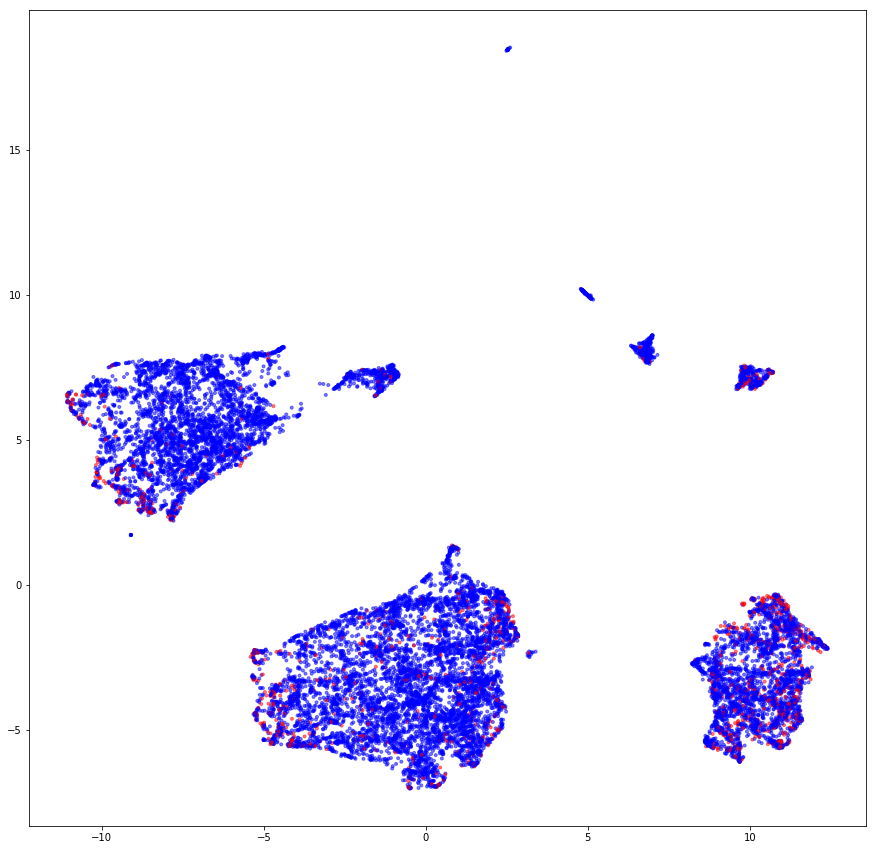

In [36]:
plt.figure(figsize=(15,15))
plt.scatter(umap_embedding[:,0], umap_embedding[:,1], c=colors, marker='.', alpha=0.5)
plt.show()

### T-SNE

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(init=principal_components.values[:,:2], perplexity=100, n_iter=5000)
tsne_embedding = tsne.fit_transform(df_train_x)

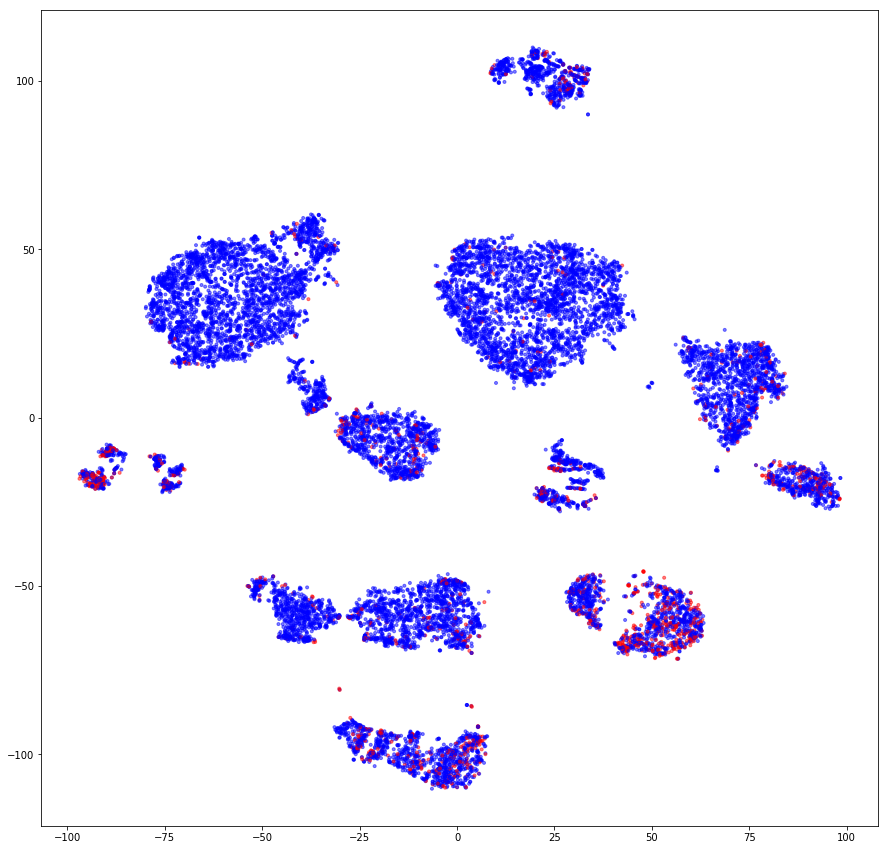

In [23]:
plt.figure(figsize=(15,15))
plt.scatter(tsne_embedding[:,0], tsne_embedding[:,1], c=colors, marker='.', alpha=0.5)
plt.show()

# Resampling

Note that we will resample INSIDE the k-fold cross validation function, so that only the training set will experience resampling and the validation set is left alone

In [123]:
from sklearn import utils

def resample(X,y):
    # Random oversampling of minority (ROS)
    label_column = y.name
    data = pd.concat([X,y], axis=1)
    
    if y[y==1].count()>y[y==0].count():
        majority = 1
        minority = 0
    else:
        majority = 0
        minority = 1
        
    data_majority = data[data[label_column]==majority]
    data_minority = data[data[label_column]==minority]
    data_minority = utils.resample(data_minority, replace=True, n_samples=len(data_majority), random_state=100)
    data_resampled = pd.concat([data_majority,data_minority], axis=0)
    data_resampled = utils.shuffle(data_resampled)
    X = data_resampled.drop([label_column], axis=1)
    y = data_resampled[label_column]
    
    return X, y

# Model Training

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [125]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from scipy import interp
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.gridspec as grids
import matplotlib.pyplot as plt
import itertools
import copy

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,size=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,size=12)
    # [Negative, Positive], according to confusion m benchmark
    plt.yticks(tick_marks,classes,size=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label',size=14)
    plt.xlabel('Predicted Label',size=14)

def k_fold_cv(classifier, X, y, cv=10, resampling_func=None,
                  print_score=True, plot_rc=True, plot_cm=True):
    SKF = StratifiedKFold(n_splits=cv,shuffle=True,random_state=100)
    ytest = {}; ypred = {};
    Accuracy = []; Recall = []; Precision = []; F_one = []
    fpr = {} # False Positive Rate
    tpr = {} # True Positive Rate
    p = {} # Precision
    r = {} # Recall
    roc_auc = {} # Area Under Curve
    tprs = []; aucs = []; mean_fpr = np.linspace(0,1,100)
    j = int(0)
    print('BUILDING MODEL ======')
    for train_index, test_index in SKF.split(X,y):
        Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
        ytrain, ytest[j] = y.iloc[train_index], y.iloc[test_index]
        
        if resampling_func!=None:
            Xtrain, ytrain = resampling_func(Xtrain, ytrain)
        
        classifier.fit(Xtrain,ytrain)
        
        ypred_train = classifier.predict(Xtrain)
        acc_score_train = metrics.accuracy_score(ytrain,ypred_train) # Accuracy
        rec_score_train = metrics.recall_score(ytrain,ypred_train) # Recall
        prec_score_train = metrics.precision_score(ytrain,ypred_train) # Precision
        f1_value_train = metrics.f1_score(ytrain,ypred_train)
        
        ypred[j] = classifier.predict(Xtest)
        ypred_prob = classifier.predict_proba(Xtest)[:,1]
        # ypred_prob [:,0] => Probability Negative Class
        # ypred_prob [:,1] => Probability Positive Class
        
        # Compute FPR & TPR for ROC Curve
        fpr[j], tpr[j],_ = metrics.roc_curve(ytest[j], ypred_prob)
        # Compute Precision & Recall for Precision-Recall Curve
        p[j], r[j],_ = metrics.precision_recall_curve(ytest[j], ypred_prob)
        tprs.append(interp(mean_fpr, fpr[j], tpr[j]))
        tprs[-1][0] = 0.0
        roc_auc[j] = metrics.auc(fpr[j], tpr[j]) # Compute AUC
        aucs.append(roc_auc[j])
        acc_score = metrics.accuracy_score(ytest[j],ypred[j]) # Accuracy
        Accuracy.append(acc_score);
        rec_score = metrics.recall_score(ytest[j],ypred[j]) # Recall
        Recall.append(rec_score);
        prec_score = metrics.precision_score(ytest[j],ypred[j]) # Precision
        Precision.append(prec_score);
        f1_value = metrics.f1_score(ytest[j],ypred[j])
        F_one.append(f1_value)
        print('Step: %d-%d fold {train/test} (Acc: %0.4f/%0.4f; Rec: %0.4f/%0.4f; Prec: %0.4f/%0.4f; F1: %0.4f/%0.4f)'\
                                              % ((j+1), cv,
                                                 acc_score_train, acc_score,
                                                 rec_score_train, rec_score,
                                                 prec_score_train, prec_score,
                                                 f1_value_train, f1_value))
        j += 1
    print('=====================')
    Accuracy = np.array(Accuracy); Recall = np.array(Recall)
    Precision = np.array(Precision); F_one = np.array(F_one)
    if print_score:
        print('Average Accuracy: %0.5f' % Accuracy.mean())
        print('Average Recall: %0.5f (Hit Rate)' % Recall.mean())
        print('Average Precision: %0.5f (Positive Predictive Value)' % Precision.mean())
        print('Average F1 Score: %0.5f (0:Worst, 1:Best)' % F_one.mean())
    if plot_rc:
        plt.figure(figsize=(25,10))
        gs = grids.GridSpec(1,2)
        ax = plt.subplot(gs[0])
        for i in range(0,cv):
            plt.plot(fpr[i], tpr[i], lw=2,
                     label='ROC fold %d (AUC = %0.3f)' % (i+1,roc_auc[i]),
                     alpha=0.5)
        plt.plot([0, 1], [0, 1], color='navy', lw=2,
                 linestyle='--', label='Luck')
        mean_tpr = np.mean(tprs, axis=0);
        mean_tpr[-1] = 1.0; std_tpr = np.std(tprs, axis=0)
        mean_auc = metrics.auc(mean_fpr, mean_tpr); std_auc = np.std(aucs)
        plt.plot(mean_fpr, mean_tpr, color='b',
                 label=r'Mean ROC (AUC = %0.2f $\pm$ %0.3f)' % (mean_auc, std_auc),
                 lw=3, alpha=1)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.3,
                         label=r'$\pm$ 1 std. dev.')
        ax.set_title('Receiver Operating Characteristic Curve',size=25)
        ax.set_xlabel('False Positive Rate',size=20)
        ax.set_ylabel('True Positive Rate',size=20)
        plt.xlim(0,1); plt.ylim(0,1)
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.legend(loc="lower right",prop = FontProperties(size=15))    
        ax = plt.subplot(gs[1])
        for i in range(0,cv):
            plt.step(r[i], p[i], lw=2,
                     label='PR fold %d' % (i+1),
                     alpha=0.5)
        ax.set_title('Precision-Recall Curve',size=25)
        ax.set_xlabel('Recall (Hit Rate)',size=20)
        ax.set_ylabel('Precision (Positive Predictive Value)',size=20)
        plt.xlim(0,1); plt.ylim(0,1)
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.legend(loc="upper right",prop = FontProperties(size=15))
        plt.show()
    if plot_cm:
        index_max = np.where(Accuracy==Accuracy.max())[0][0]
        Ytrue = ytest[index_max]
        Ypred = ypred[index_max]
        cm = metrics.confusion_matrix(Ytrue,Ypred)
        print('Total Data Used : %d' % len(Ytrue))
        plot_confusion_matrix(cm, ['No','Yes'], title='Confusion Matrix',
                              cmap=plt.cm.Blues)

BUILDING MODEL ======
Step: 1-10 fold {train/test} (Acc: 0.7181/0.7200; Rec: 0.7239/0.6765; Prec: 0.7156/0.1909; F1: 0.7197/0.2977)
Step: 2-10 fold {train/test} (Acc: 0.7140/0.7077; Rec: 0.7197/0.6250; Prec: 0.7115/0.1745; F1: 0.7156/0.2729)
Step: 3-10 fold {train/test} (Acc: 0.7155/0.7077; Rec: 0.7175/0.6985; Prec: 0.7147/0.1874; F1: 0.7161/0.2955)
Step: 4-10 fold {train/test} (Acc: 0.7336/0.7090; Rec: 0.7560/0.7721; Prec: 0.7237/0.2000; F1: 0.7395/0.3177)
Step: 5-10 fold {train/test} (Acc: 0.7117/0.7088; Rec: 0.7155/0.7206; Prec: 0.7102/0.1918; F1: 0.7128/0.3029)
Step: 6-10 fold {train/test} (Acc: 0.7167/0.7011; Rec: 0.7246/0.6912; Prec: 0.7133/0.1825; F1: 0.7189/0.2888)
Step: 7-10 fold {train/test} (Acc: 0.7125/0.6908; Rec: 0.7128/0.7500; Prec: 0.7124/0.1865; F1: 0.7126/0.2987)
Step: 8-10 fold {train/test} (Acc: 0.7040/0.7276; Rec: 0.7100/0.8088; Prec: 0.7016/0.2174; F1: 0.7058/0.3427)
Step: 9-10 fold {train/test} (Acc: 0.7086/0.7030; Rec: 0.7181/0.6691; Prec: 0.7046/0.1798; F1: 0.7

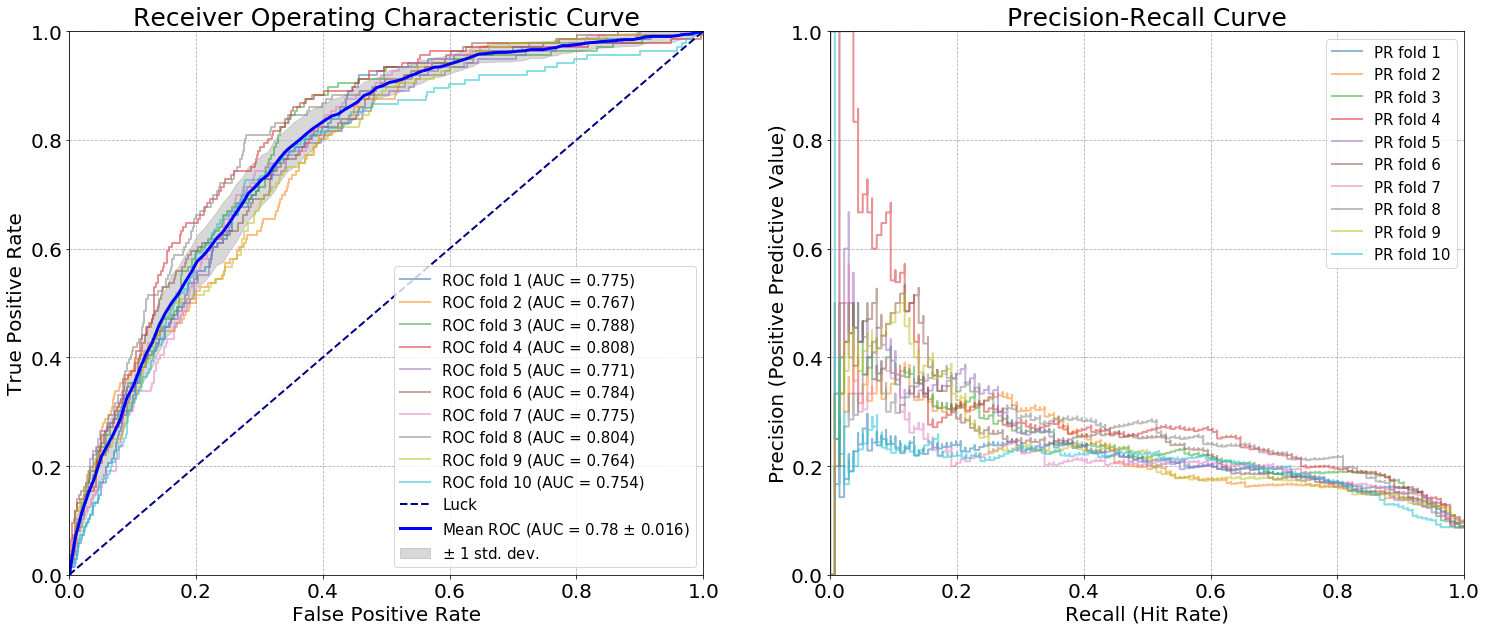

Total Data Used : 1549
Confusion matrix, without normalization


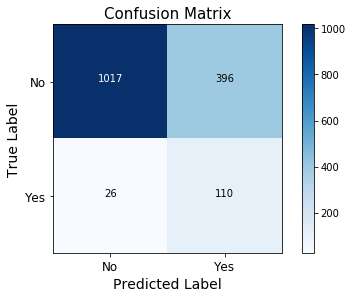

In [130]:
LR = LogisticRegression(class_weight='balanced', penalty='l2')
k_fold_cv(LR, df_train_x, df_train_y, resampling_func=resample)

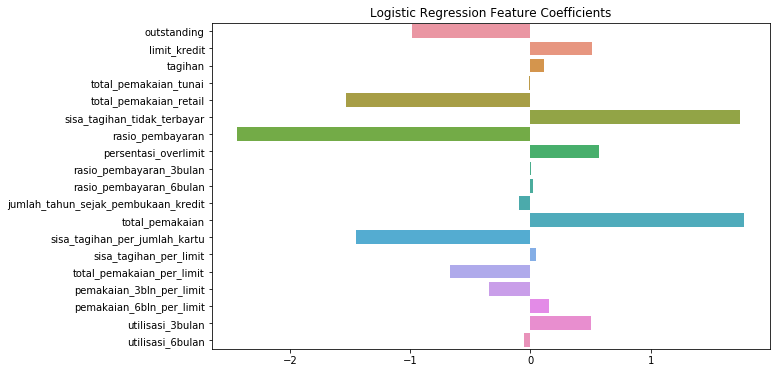

In [115]:
LR.fit(df_train_x, df_train_y)
plt.figure(figsize=(10,6))
sns.barplot(x=LR.coef_[0,:], y=df_train_x.columns)
plt.title('Logistic Regression Feature Coefficients')
plt.show()

BUILDING MODEL ======
Step: 1-10 fold {train/test} (Acc: 1.0000/0.9161; Rec: 1.0000/0.2353; Prec: 1.0000/0.5517; F1: 1.0000/0.3299)
Step: 2-10 fold {train/test} (Acc: 1.0000/0.9148; Rec: 1.0000/0.2206; Prec: 1.0000/0.5357; F1: 1.0000/0.3125)
Step: 3-10 fold {train/test} (Acc: 1.0000/0.9110; Rec: 1.0000/0.2574; Prec: 1.0000/0.4861; F1: 1.0000/0.3365)
Step: 4-10 fold {train/test} (Acc: 1.0000/0.9052; Rec: 1.0000/0.2132; Prec: 1.0000/0.4203; F1: 1.0000/0.2829)
Step: 5-10 fold {train/test} (Acc: 1.0000/0.9154; Rec: 1.0000/0.2500; Prec: 1.0000/0.5397; F1: 1.0000/0.3417)
Step: 6-10 fold {train/test} (Acc: 1.0000/0.9083; Rec: 1.0000/0.2426; Prec: 1.0000/0.4583; F1: 1.0000/0.3173)
Step: 7-10 fold {train/test} (Acc: 1.0000/0.9070; Rec: 1.0000/0.2059; Prec: 1.0000/0.4375; F1: 1.0000/0.2800)
Step: 8-10 fold {train/test} (Acc: 1.0000/0.9122; Rec: 1.0000/0.2132; Prec: 1.0000/0.5000; F1: 1.0000/0.2990)
Step: 9-10 fold {train/test} (Acc: 1.0000/0.9070; Rec: 1.0000/0.2059; Prec: 1.0000/0.4375; F1: 1.0

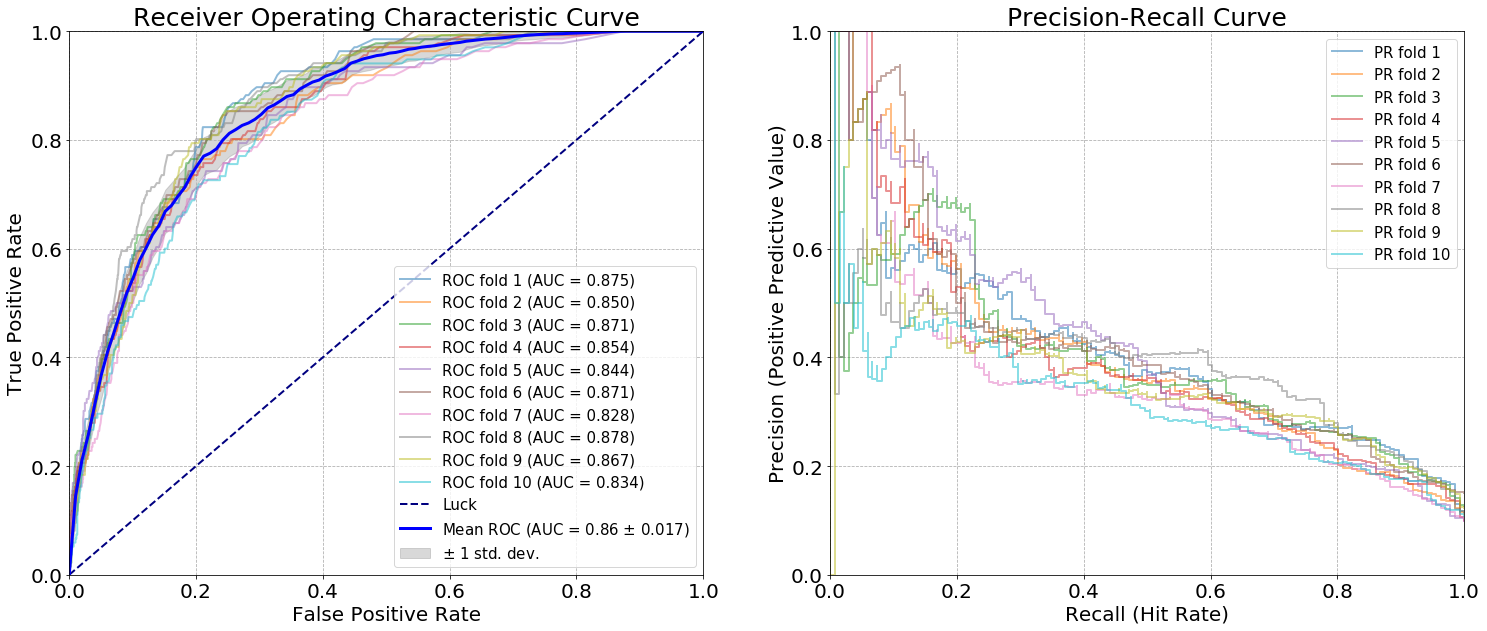

Total Data Used : 1550
Confusion matrix, without normalization


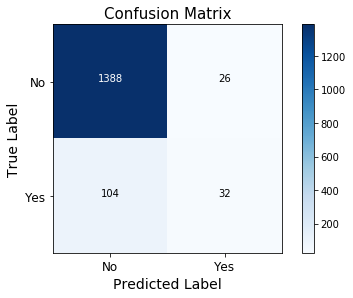

In [131]:
RFC = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             criterion='entropy', max_depth=None, max_features='auto',
                             max_leaf_nodes=None, min_impurity_decrease=0.0,
                             min_impurity_split=None, min_samples_leaf=1,
                             min_samples_split=2, min_weight_fraction_leaf=0.0,
                             n_estimators=500, n_jobs=-1, oob_score=False, random_state=1,
                             verbose=0, warm_start=False)

k_fold_cv(RFC, df_train_x, df_train_y, resampling_func=resample)

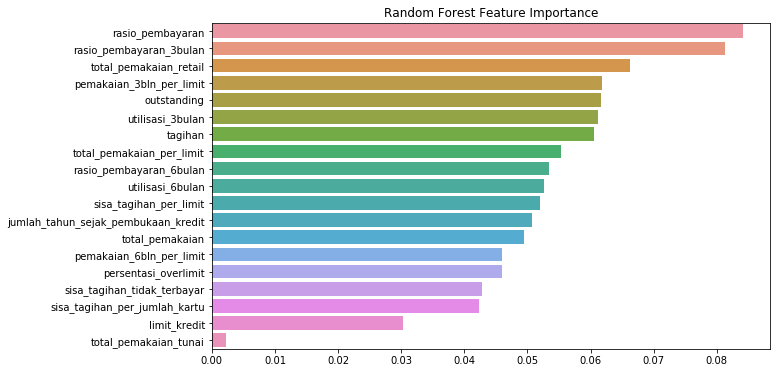

In [ ]:
RFC.fit(df_train_x, df_train_y)
asd = pd.Series(RFC.feature_importances_, df_train_x.columns.values)
asd.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10,6))
sns.barplot(x=asd.values, y=asd.index)
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
SVC = SVC(probability=True)
k_fold_cv(SVC, df_train_x, df_train_y, resampling_func=resample)

BUILDING MODEL ======
Step: 1-10 fold {train/test} (Acc: 0.7800/0.7290; Rec: 0.8439/0.7647; Prec: 0.7483/0.2114; F1: 0.7932/0.3312)
Step: 2-10 fold {train/test} (Acc: 0.7874/0.7129; Rec: 0.8565/0.7279; Prec: 0.7525/0.1953; F1: 0.8011/0.3079)
Step: 3-10 fold {train/test} (Acc: 0.7858/0.7174; Rec: 0.8608/0.8015; Prec: 0.7485/0.2096; F1: 0.8007/0.3323)
Step: 4-10 fold {train/test} (Acc: 0.7868/0.6942; Rec: 0.8668/0.8235; Prec: 0.7473/0.1993; F1: 0.8026/0.3209)


In [ ]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

k_fold_cv(XGB, df_train_x, df_train_y, resampling_func=resample)

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from keras.models import Sequential
from keras.layers import Dense, Dropout, Softmax
from keras.regularizers import l1, l2
from sklearn import metrics
import numpy as np

# Build our neural net as a scikit-learn classifier
class NeuralNetworkClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, hidden_layer_sizes=(100,), alpha=0.0001):
        self.epochs = epochs
        self.hidden_layer_sizes = hidden_layer_sizes
        self.alpha = alpha
    
    def fit(self, X, y):
        self._model = Sequential()
        for i, layer_size in enumerate(self.hidden_layer_sizes):
            if i==0:
                self._model.add(Dense(layer_size, activation='relu', kernel_regularizer=l2(self.alpha),
                                     input_shape=(X.shape[1],)))
            else:
                self._model.add(Dense(layer_size, activation='relu', kernel_regularizer=l2(self.alpha)))
        self._model.add(Dense(2, activation='softmax'))
        self._model.compile(loss='categorical_crossentropy', optimizer='adam')
        
        y = pd.get_dummies(y)
        self._model.fit(X, y, batch_size=128, epochs=self.epochs, verbose=False)
    
    def predict(self, X):
        return self._model.predict_classes(X, batch_size=None)
    
    def predict_proba(self, X):
        return self._model.predict_proba(X, batch_size=None)
        
    def score(self, X, y):
        return metrics.roc_auc_score(y, self.predict(X), average='micro')

In [ ]:
NN = NeuralNetworkClassifier(hidden_layer_sizes=(128,), epochs=10, alpha=0)
k_fold_cv(NN, df_train_x, df_train_y, resampling_func=resample)

In [ ]:
MLP = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64,32), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

k_fold_cv(MLP, df_train_x, df_train_y, resampling_func=resample)